<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/나도코딩/ScikitLearn/LinearRegressionData.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [ ]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [ ]:
import numpy as np
x = np.array([9])
x

array([9])

In [ ]:
y_pred = reg.predict([[10]]) # X 에 대한 예측 값
y_pred

array([105.52768566])

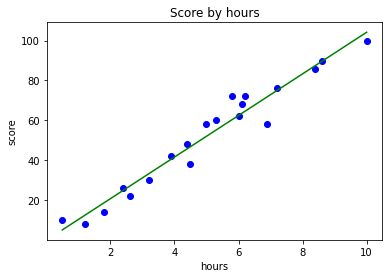

In [ ]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [ ]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [ ]:
reg.intercept_ # y 절편 (b)

-0.218484702867201

y = mx + b  -> y = 10.4436x - 0.2184

### 데이터 세트 분리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/나도코딩/ScikitLearn/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련 80 : 테스트 20 으로 분리

In [ ]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]), 20)

In [ ]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]), 16)

In [ ]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]), 4)

In [ ]:
y, len(y) # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]), 20)

In [ ]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [ ]:
y_test, len(y_test) # 테스트 세트 y

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

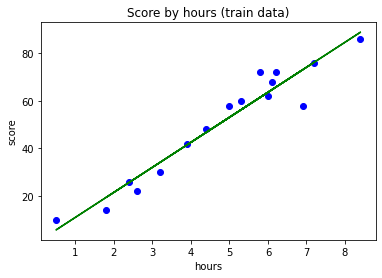

In [ ]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

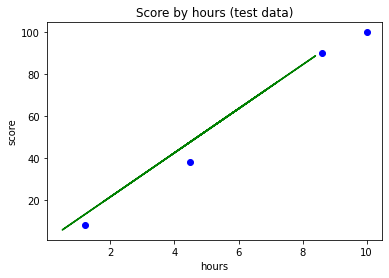

In [ ]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
reg.coef_

array([10.49161294])

In [ ]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [ ]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [ ]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률 (learning rate)

In [ ]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)

# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

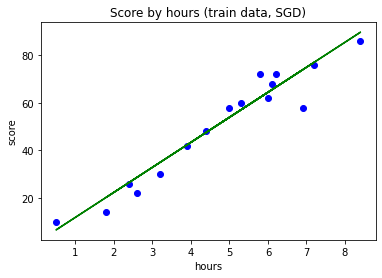

In [ ]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
sr.coef_, sr.intercept_
# 주의 : SGDRegressor() 객체를 생성할 때 random_state 값을 지정하지 않았으므로 결과가 다르게 나타날 수 있습니다

(array([10.50505388]), array([1.36165803]))

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가 

0.9660929109073586

In [ ]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가 

0.9343975052138009